# Timeseries related coverages demo

In this notebook we use the backend API to retrieve a time series and then plot it, along with its related coverages

In [6]:
%matplotlib widget

import httpx
import matplotlib.pyplot as plt
import pandas as pd


def _parse_to_dataframe(time_series: dict):
    df = pd.DataFrame.from_records(time_series["values"])
    df["datetime"] = pd.to_datetime(df["datetime"])
    df.set_index("datetime", inplace=True)
    return df    


api_url = "http://webapp:5001/api/v2/coverages/time-series/{coverage_identifier}"

## Seasonal data

In [12]:
coverage_identifier = "tas_seasonal_absolute_model_ensemble-rcp26-DJF"
point_coords = "POINT(11.5469 44.9524)"
date_range = "../.."


raw_response = httpx.get(
    api_url.format(coverage_identifier=coverage_identifier),
    params={
        "coords": point_coords,
        "datetime": date_range,
        "include_coverage_data": True,
        "include_observation_data": True,
        "coverage_data_smoothing": [
            "NO_SMOOTHING",
            "MOVING_AVERAGE_11_YEARS",
            "LOESS_SMOOTHING",
        ],
        "include_coverage_uncertainty": False,
        "include_coverage_related_data": False,
    }
)
try:
    raw_response.raise_for_status()
except httpx.HTTPStatusError as err:
    print(raw_response.json())
    raise

raw_series = raw_response.json()["series"]

seasonal_series = {s["name"]: s for s in raw_series}

seasonal_dfs = {v["name"]: _parse_to_dataframe(v) for v in seasonal_series.values()}

### Plotting

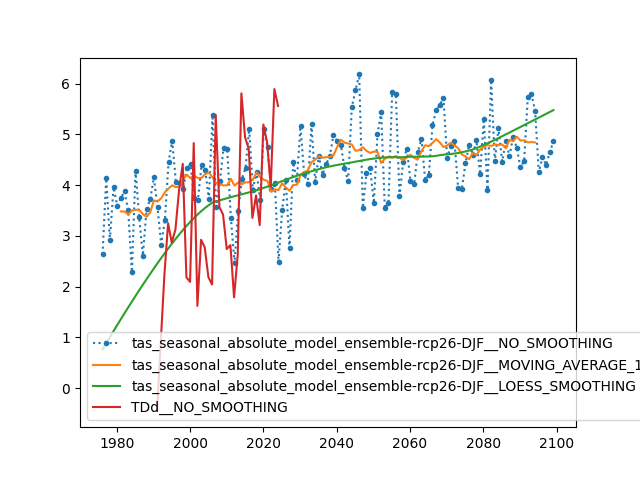

In [13]:
fig, ax = plt.subplots()

raw_tas_line, = ax.plot(
    seasonal_dfs[f"{coverage_identifier}__NO_SMOOTHING"], 
    label=f"{coverage_identifier}__NO_SMOOTHING"
)
raw_tas_line.set_linestyle(":")
raw_tas_line.set_marker(".")

already_plotted = (
    f"{coverage_identifier}__NO_SMOOTHING",
)
for name, df in seasonal_dfs.items():
    if name not in already_plotted:
        ax.plot(df, label=name)


ax.legend()

In [26]:
ax.clear()

## Yearly data

In [14]:
coverage_identifier = "tas_annual_absolute_model_ensemble-rcp26"
point_coords = "POINT(11.5469 44.9524)"
date_range = "../.."


raw_response = httpx.get(
    api_url.format(coverage_identifier=coverage_identifier),
    params={
        "coords": point_coords,
        "datetime": date_range,
        "include_coverage_data": True,
        "include_observation_data": True,
        "coverage_data_smoothing": [
            "NO_SMOOTHING",
            "MOVING_AVERAGE_11_YEARS",
            "LOESS_SMOOTHING",
        ],
        "include_coverage_uncertainty": False,
        "include_coverage_related_data": False,
    }
)
try:
    raw_response.raise_for_status()
except httpx.HTTPStatusError as err:
    print(raw_response.json())
    raise

yearly_raw_series = raw_response.json()["series"]

yearly_series = {s["name"]: s for s in yearly_raw_series}

yearly_dfs = {v["name"]: _parse_to_dataframe(v) for v in yearly_series.values()}

### Plotting

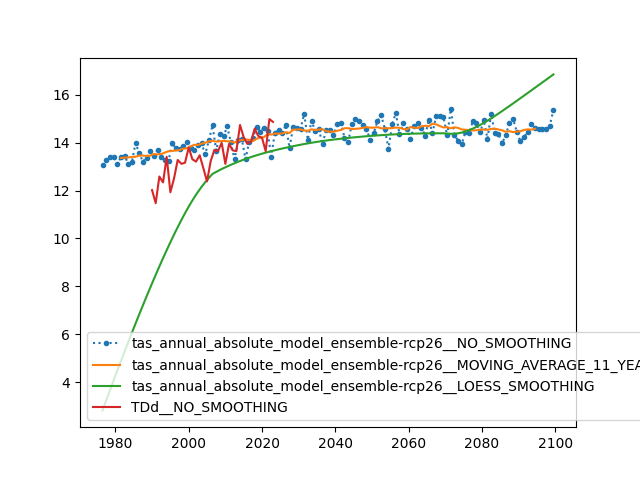

In [15]:
fig, ax = plt.subplots()

raw_tas_line, = ax.plot(
    yearly_dfs[f"{coverage_identifier}__NO_SMOOTHING"], 
    label=f"{coverage_identifier}__NO_SMOOTHING"
)
raw_tas_line.set_linestyle(":")
raw_tas_line.set_marker(".")

already_plotted = (
    f"{coverage_identifier}__NO_SMOOTHING",
)
for name, df in yearly_dfs.items():
    if name not in already_plotted:
        ax.plot(df, label=name)


ax.legend()